<h1>Génération de la matrice</h1>

<h1>Optimisation par colonie de fourmis</h1>

In [59]:
import numpy as np
from numpy.random import choice as np_choice
import warnings
warnings.filterwarnings("ignore")
def VRP_ACO(matrice, num_iterations):
    # Évaluer la qualité des solutions
    def calculer_distance_total(solution, matrice):
        distances = matrice[solution[:-1], solution[1:]]
        return np.sum(distances)

    def maj_pheromone(matrice_pheromone, routes, distances):
        evaporation = 0.5

        # Évaporation des phéromones   
        matrice_pheromone *= (1 - evaporation)

        # Dépôt de phéromones sur les meilleures routes
        for route, distance in zip(routes, distances):
            pheromones = Q / distance
            matrice_pheromone[route[:-1], route[1:]] += pheromones

    def maj_pheromone_intensification(matrice_pheromone, routes_visitees, intensite):
        for route in routes_visitees:
            for i in range(len(route) - 1):
                ville_actuelle = route[i]
                ville_suivante = route[i + 1]
                matrice_pheromone[ville_actuelle, ville_suivante] += intensite

    def selectionner_ville(matrice_pheromone, current_ville, ville_non_visitee, alpha, beta):

        pheromone = matrice_pheromone[current_ville, ville_non_visitee]
        
        distance = matrice[current_ville, ville_non_visitee]
        
        proba = (pheromone ** alpha * (1.0 / distance) ** beta).astype(float)

        proba[distance == 0] = 0  # Gérer les distances nulles
        
        total_proba = np.sum(proba)
        if total_proba == 0:
            proba = np.ones(len(proba)) / len(proba)
        else:
            proba /= total_proba

        proba = np.maximum(proba, 0)

        next_ville_index = np_choice(len(ville_non_visitee), p=proba)
        next_ville = ville_non_visitee[next_ville_index]

        return next_ville

    def vrp(matrice, num_fourmis, num_iterations, alpha, beta):
        num_ville = len(matrice)
        matrice_pheromone = np.ones((num_ville, num_ville))  # Matrice des phéromones
        best_route = None
        best_distance = float('inf')

        for i in range(num_iterations):
            routes_visitees = []  # Routes visitées par les fourmis
            routes = []
            distances = []

            for j in range(num_fourmis):
                route = [0]  # Dépôt initial
                ville_non_visitees = np.arange(1, num_ville)  # Villes non visitées
                while ville_non_visitees.size > 0:
                    current_ville = route[-1]
                    next_ville = selectionner_ville(matrice_pheromone, current_ville, ville_non_visitees, alpha, beta)
                    route.append(next_ville)
                    ville_non_visitees = np.delete(ville_non_visitees, np.where(ville_non_visitees == next_ville))

                route.append(0)  # Retour au dépôt

                if ville_non_visitees.size == 0 and route[-1] == 0:
                    distance = calculer_distance_total(route, matrice)
                    routes.append(route)
                    distances.append(distance)

                    if distance < best_distance:
                        best_route = route
                        best_distance = distance

                    routes_visitees.append(route)

            maj_pheromone(matrice_pheromone, routes, distances)
            maj_pheromone_intensification(matrice_pheromone, routes_visitees, intensite)  # Intensification de la matrice de phéromone

        return best_route, best_distance

    # On répartit entre le nombre de camions
    def repartir_routes_optimal(route, num_camions):
        villes = route[1:-1]  # Liste des villes à répartir (excluant le dépôt)
        num_villes = len(villes)

        # Calcul de la distance totale de la route
        distance_totale = calculer_distance_total(route, matrice)

        # Calcul de la distance moyenne par camion
        distance_moyenne = distance_totale / num_camions

        camions_routes = []
        longueurs_routes = []

        camion_route = [0]  # Dépôt initial
        longueur_route = 0

        for i in range(num_villes):
            ville = villes[i]
            ville_suivante = villes[i + 1] if i < num_villes - 1 else 0  # Prochaine ville ou retour au dépôt

            # Ajout de la ville à la route actuelle
            camion_route.append(ville)
            longueur_route += matrice[ville][ville_suivante]

            # Si la longueur de la route actuelle dépasse la distance moyenne, on la termine et on commence une nouvelle route
            if longueur_route > distance_moyenne:
                camion_route.append(0)  # Retour au dépôt
                camions_routes.append(camion_route)
                longueurs_routes.append(longueur_route)

                camion_route = [0]  # Nouvelle route avec le dépôt initial
                longueur_route = 0

        # Ajout de la dernière route incomplète
        camion_route.append(0)  # Retour au dépôt
        camions_routes.append(camion_route)
        longueurs_routes.append(longueur_route)

        return camions_routes, longueurs_routes

    # Paramètres de l'ACO
    num_fourmis = 2
    alpha = 1.0  # Influence de la phéromone
    beta = 5.0  # Influence de la visibilité   
    Q = 70  # Quantité de phéromone déposée par les fourmis
    intensite = 3.6 #intensification des pheromones
    num_camions = 3  # Quantité de camions

    best_route, best_distance = vrp(matrice, num_fourmis, num_iterations, alpha, beta)
    camions_routes, longueurs_routes = repartir_routes_optimal(best_route, num_camions)

    return best_distance

    

<h1>Tests des paramètres</h1>

In [ ]:
matrice = generate_weighted_adjacency_matrix(5000)
num_fourmis = 2
num_iterations = 10
rho = 0.5
alpha = 2.0  # Influence de la phéromone
beta = 5.0  # Influence de la visibilité   
Q = 100  # Quantité de phéromone déposée par les fourmis
intensite = 1.7 #intensification des pheromones

ACO = VRP_ACO(matrice, num_fourmis, num_iterations, rho, alpha, beta, Q, intensite)

for i in range(1,15):
    num_fourmis = i
    

In [14]:
import numpy as np
import itertools

# Paramètres de l'ACO
num_fourmis = 2
num_iterations = 10
rho_values = np.arange(0.1, 1.0, 0.1)
alpha_values = np.arange(1, 6)
beta_values = np.arange(1, 6)
Q_values = np.arange(10, 160, 10)
intensite_values = np.arange(0.1, 5.1, 0.5)

matrice = generate_weighted_adjacency_matrix(3000)

# Fonction pour exécuter l'ACO avec un ensemble de paramètres
def tester_parametres_ACO(matrice, num_fourmis, num_iterations, rho, alpha, beta, Q, intensite):
    print("rho =", rho, "| alpha =", alpha, "| beta =", beta, "| Q =", Q, "| intensite =", intensite)
    distances = []
    for _ in range(3):
        distance = VRP_ACO(matrice, num_fourmis, num_iterations, rho, alpha, beta, Q, intensite)
        distances.append(distance)
    moyenne_distance = np.mean(distances)
    meilleur_distance = np.min(distances)
    print("----------------------------------------")
    print("Distance moyenne :", moyenne_distance)
    print("Meilleure distance :", meilleur_distance)
    print("----------------------------------------")

# Générer toutes les combinaisons de paramètres possibles
combinations = list(itertools.product(rho_values, alpha_values, beta_values, Q_values, intensite_values))

# Tester chaque combinaison de paramètres
for combination in combinations:
    rho, alpha, beta, Q, intensite = combination
    tester_parametres_ACO(matrice, num_fourmis, num_iterations, rho, alpha, beta, Q, intensite)


rho = 0.1 | alpha = 1 | beta = 1 | Q = 10 | intensite = 0.1
----------------------------------------
Distance moyenne : 54928.666666666664
Meilleure distance : 53755
----------------------------------------
rho = 0.1 | alpha = 1 | beta = 1 | Q = 10 | intensite = 0.6
----------------------------------------
Distance moyenne : 55102.333333333336
Meilleure distance : 54661
----------------------------------------
rho = 0.1 | alpha = 1 | beta = 1 | Q = 10 | intensite = 1.1
----------------------------------------
Distance moyenne : 52648.333333333336
Meilleure distance : 52022
----------------------------------------
rho = 0.1 | alpha = 1 | beta = 1 | Q = 10 | intensite = 1.6
----------------------------------------
Distance moyenne : 52404.0
Meilleure distance : 52281
----------------------------------------
rho = 0.1 | alpha = 1 | beta = 1 | Q = 10 | intensite = 2.1
----------------------------------------
Distance moyenne : 51308.0
Meilleure distance : 50448
----------------------------

<h1>Diff matrices</h1>

<h3>variations itérations</h3>

In [33]:
import matplotlib.pyplot as plt 
import warnings
import time
import numpy as np
warnings.filterwarnings("ignore")

num_villes = 1000
num_clients = num_villes - 1  # Exclure le dépôt

def generate_weighted_adjacency_matrix(n):
    adjacency_matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.random() < 0.8:
                weight = np.random.randint(1, 1000)
                adjacency_matrix[i][j] = weight
                adjacency_matrix[j][i] = weight
    return adjacency_matrix
matrice = generate_weighted_adjacency_matrix(2000)

resultats100=[]
dist100=[]
resultats200=[]
dist200=[]
resultats300=[]
dist300=[]
resultats400=[]
dist400=[]
resultats500=[]
dist500=[]
resultats1000=[]
dist1000=[]

for i in range(0, 1):
    iterations = 5
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, iterations)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist100.append(RES)
    resultats100.append(elapsed_time)

for i in range(0, 1):
    iterations = 10
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, iterations)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist200.append(RES)
    resultats200.append(elapsed_time)

for i in range(0, 1):
    iterations = 30
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, iterations)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist300.append(RES)
    resultats300.append(elapsed_time)

for i in range(0, 1):
    iterations = 40
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, iterations)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist400.append(RES)
    resultats400.append(elapsed_time)

for i in range(0, 1):
    iterations = 50
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, iterations)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist500.append(RES)
    resultats500.append(elapsed_time)

for i in range(0, 1):
    iterations = 100
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, iterations)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist1000.append(RES)
    resultats1000.append(elapsed_time)


print(resultats100)
print(resultats200)
print(resultats300)
print(resultats400)
print(resultats500)
print(resultats1000)

print(dist100)
print(dist200)
print(dist300)
print(dist400)
print(dist500)
print(dist1000)

# Graphique de distance/nombre d'itérations
plt.figure()
plt.plot([5, 10, 30, 40, 50, 100], [dist100[0], dist200[0], dist300[0], dist400[0], dist500[0], dist1000[0]])
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Distance')
plt.title('Distance en fonction du nombre d\'itérations')
plt.show()

# Graphique nombre d'itérations/temps
plt.figure()
plt.plot([5, 10, 30, 40, 50, 100], [resultats100[0], resultats200[0], resultats300[0], resultats400[0], resultats500[0], resultats1000[0]])
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Temps (secondes)')
plt.title('Temps en fonction du nombre d\'itérations')
plt.show()


---------------------------Résultats itérations N° 1 ----------------------------


TypeError: VRP_ACO() takes 1 positional argument but 2 were given

<h3>variations num_fourmis</h3>

In [ ]:
import matplotlib.pyplot as plt 
import warnings
import time
warnings.filterwarnings("ignore")

num_villes = 1000
num_clients = num_villes - 1  # Exclure le dépôt

def generate_weighted_adjacency_matrix(n):
    adjacency_matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.random() < 0.8:
                weight = np.random.randint(1, 500)
                adjacency_matrix[i][j] = weight
                adjacency_matrix[j][i] = weight
    return adjacency_matrix
matrice = generate_weighted_adjacency_matrix(2000)

resultats100=[]
dist100=[]
resultats200=[]
dist200=[]
resultats300=[]
dist300=[]
resultats400=[]
dist400=[]
resultats500=[]
dist500=[]
resultats1000=[]
dist1000=[]
resultats10001=[]
dist10001=[]
resultats10002=[]
dist10002=[]

for i in range(0, 1):
    num_fourmis = 2
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist100.append(RES)
    resultats100.append(elapsed_time)

for i in range(0, 1):
    num_fourmis = 5
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist200.append(RES)
    resultats200.append(elapsed_time)

for i in range(0, 1):
    num_fourmis = 10
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist300.append(RES)
    resultats300.append(elapsed_time)

for i in range(0, 1):
    num_fourmis = 15
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist400.append(RES)
    resultats400.append(elapsed_time)

for i in range(0, 1):
    num_fourmis = 30
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist500.append(RES)
    resultats500.append(elapsed_time)

for i in range(0, 1):
    num_fourmis = 50
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist1000.append(RES)
    resultats1000.append(elapsed_time)
for i in range(0, 1):
    num_fourmis = 70
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist10001.append(RES)
    resultats10001.append(elapsed_time)
for i in range(0, 1):
    num_fourmis = 90
    print("---------------------------Résultats itérations N°", i + 1, "----------------------------")
    st = time.time()
    RES = VRP_ACO(matrice, num_fourmis)
    print(RES)
    et = time.time()
    elapsed_time = et - st
    dist10002.append(RES)
    resultats10002.append(elapsed_time)


print(resultats100)
print(resultats200)
print(resultats300)
print(resultats400)
print(resultats500)
print(resultats1000)
print(resultats10001)
print(resultats10002)

print(dist100)
print(dist200)
print(dist300)
print(dist400)
print(dist500)
print(dist1000)
print(dist10001)
print(dist10002)

# Graphique de distance/nombre d'itérations
plt.figure()
plt.plot([2, 5, 10, 15, 30, 50, 70, 90], [dist100[0], dist200[0], dist300[0], dist400[0], dist500[0], dist1000[0], dist10001[0], dist10002[0]])
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Distance')
plt.title('Distance en fonction du nombre de fourmis')
plt.show()

# Graphique nombre d'itérations/temps
plt.figure()
plt.plot([2, 5, 10, 15, 30, 50, 70, 90], [resultats100[0], resultats200[0], resultats300[0], resultats400[0], resultats500[0], resultats1000[0], resultats10001[0], resultats10002[0]])
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Temps (secondes)')
plt.title('Temps en fonction du nombre de fourmis')
plt.show()

<h3>variation taille matrice</h3>

---------------------------Résultats Matrice 10x10----------------------------
---------------------------Résultats Matrice N° 1 ----------------------------
---------------------------Résultats Matrice N° 2 ----------------------------
---------------------------Résultats Matrice N° 3 ----------------------------
---------------------------Résultats Matrice N° 4 ----------------------------
---------------------------Résultats Matrice N° 5 ----------------------------
---------------------------Résultats Matrice N° 6 ----------------------------
---------------------------Résultats Matrice N° 7 ----------------------------
---------------------------Résultats Matrice N° 8 ----------------------------
---------------------------Résultats Matrice N° 9 ----------------------------
---------------------------Résultats Matrice N° 10 ----------------------------
---------------------------Résultats Matrice 100x100----------------------------
---------------------------Résultats Matrice N° 1

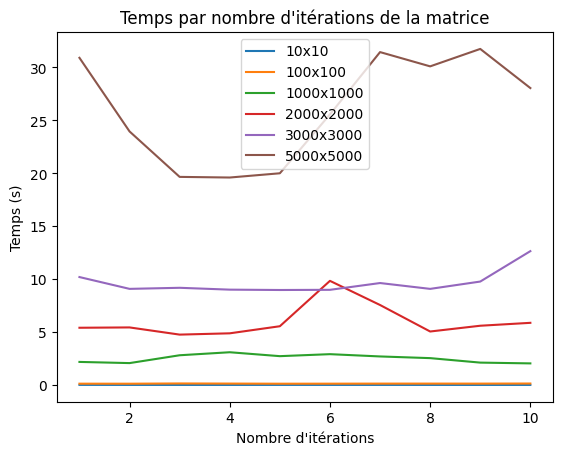

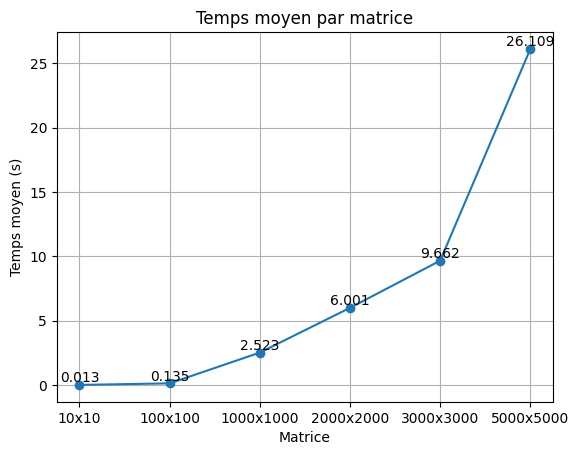

In [32]:
import matplotlib.pyplot as plt 
import warnings
import time
warnings.filterwarnings("ignore")
 
resultats10x10=[]
resultats100x100=[]
resultats1000x1000=[]
resultats2000x2000=[]
resultats3000x3000=[]
resultats5000x5000=[]

print("---------------------------Résultats Matrice 10x10----------------------------")
for i in range(0,10):
    num_villes = 10
    print("---------------------------Résultats Matrice N°",i+1,"----------------------------")
    matrice = generate_weighted_adjacency_matrix(num_villes)
    st = time.time()
    RES = VRP_ACO(matrice)
    et = time.time()
    elapsed_time = et - st
    resultats10x10.append(elapsed_time)
print("---------------------------Résultats Matrice 100x100----------------------------")
for i in range(0,10):
    num_villes = 100
    print("---------------------------Résultats Matrice N°",i+1,"----------------------------")
    matrice = generate_weighted_adjacency_matrix(num_villes)
    st = time.time()
    RES = VRP_ACO(matrice)
    et = time.time()
    elapsed_time = et - st
    resultats100x100.append(elapsed_time)
print("---------------------------Résultats Matrice 1000x1000----------------------------")
for i in range(0,10):
    num_villes = 1000
    print("---------------------------Résultats Matrice N°",i+1,"----------------------------")
    matrice = generate_weighted_adjacency_matrix(num_villes)
    st = time.time()
    RES = VRP_ACO(matrice)
    et = time.time()
    elapsed_time = et - st
    resultats1000x1000.append(elapsed_time)
    
print("---------------------------Résultats Matrice 2000x2000----------------------------")
for i in range(0,10):
    num_villes = 2000
    print("---------------------------Résultats Matrice N°",i+1,"----------------------------")
    matrice = generate_weighted_adjacency_matrix(num_villes)
    st = time.time()
    RES = VRP_ACO(matrice)
    et = time.time()
    elapsed_time = et - st
    resultats2000x2000.append(elapsed_time)
print("---------------------------Résultats Matrice 3000x3000----------------------------")
for i in range(0,10):
    num_villes = 3000
    print("---------------------------Résultats Matrice N°",i+1,"----------------------------")
    matrice = generate_weighted_adjacency_matrix(num_villes)
    st = time.time()
    RES = VRP_ACO(matrice)
    et = time.time()
    elapsed_time = et - st
    resultats3000x3000.append(elapsed_time)
print("---------------------------Résultats Matrice 5000x5000----------------------------")
for i in range(0,10):
    num_villes = 5000
    print("---------------------------Résultats Matrice N°",i+1,"----------------------------")
    matrice = generate_weighted_adjacency_matrix(num_villes)
    st = time.time()
    RES = VRP_ACO(matrice)
    et = time.time()
    elapsed_time = et - st
    resultats5000x5000.append(elapsed_time)

print(resultats10x10)
print(resultats100x100)
print(resultats1000x1000)
print(resultats2000x2000)
print(resultats3000x3000)
print(resultats5000x5000)

# Nombre d'itérations
iterations = range(1, len(resultats10x10) + 1)

# Tracé de la courbe
plt.plot(iterations, resultats10x10, label='10x10')
plt.plot(iterations, resultats100x100, label='100x100')
plt.plot(iterations, resultats1000x1000, label='1000x1000')
plt.plot(iterations, resultats2000x2000, label='2000x2000')
plt.plot(iterations, resultats3000x3000, label='3000x3000')
plt.plot(iterations, resultats5000x5000, label='5000x5000')
plt.legend(loc='upper right')
# Paramètres de la figure
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Temps (s)')
plt.title('Temps par nombre d\'itérations de la matrice')
plt.legend()

plt.show()

# Données
resultats = [
    (resultats10x10, '10x10'),
    (resultats100x100, '100x100'),
    (resultats1000x1000, '1000x1000'),
    (resultats2000x2000, '2000x2000'),
    (resultats3000x3000, '3000x3000'),
    (resultats5000x5000, '5000x5000')
]

# Calcul des temps moyens et numéros de matrice
temps_moyens = []
noms_matrices = []

for res, nom in resultats:
    temps_moyens.append(sum(res) / len(res))
    noms_matrices.append(nom)

# Tracé de la courbe
plt.plot(noms_matrices, temps_moyens, marker='o')

# Paramètres de la figure
plt.xlabel('Matrice')
plt.ylabel('Temps moyen (s)')
plt.title('Temps moyen par matrice')
plt.grid(True)

# Affichage des valeurs
for i, temps in enumerate(temps_moyens):
    plt.text(noms_matrices[i], temps, f'{temps:.3f}', ha='center', va='bottom')

# Affichage de la figure
plt.show()


Pour mener une étude expérimentale du comportement de l'algorithme d'optimisation proposé, voici un plan d'expérience complet :

1. Choix des instances de problème : Sélectionnez un ensemble d'instances de problème de taille variable pour évaluer les performances de l'algorithme. Vous pouvez utiliser des instances réelles ou générer des instances aléatoires en spécifiant le nombre de villes et les distances entre elles.

2. Paramètres de l'algorithme : Fixez les paramètres de l'algorithme tels que le nombre de fourmis, le nombre d'itérations, les valeurs d'alpha et de beta, la quantité de phéromone déposée (Q) et l'intensité de l'intensification des phéromones.

3. Mesures de performance : Déterminez les mesures de performance appropriées pour évaluer l'efficacité de l'algorithme. Cela peut inclure la distance totale de la meilleure solution trouvée, le temps d'exécution, le nombre d'itérations nécessaires pour converger, etc.

4. Exécution de l'algorithme : Appliquez l'algorithme à chaque instance de problème en utilisant les paramètres fixés. Enregistrez les résultats obtenus, y compris la meilleure solution trouvée, la distance totale et d'autres mesures de performance pertinentes.

5. Répétitions : Répétez les étapes 3 et 4 plusieurs fois (par exemple, 10 fois) pour obtenir des résultats moyens plus fiables et réduire les effets aléatoires.

6. Analyse statistique : Effectuez une analyse statistique des résultats obtenus pour évaluer les performances de l'algorithme. Utilisez des tests statistiques appropriés pour comparer les différentes configurations expérimentales et vérifier s'il y a des différences significatives entre les groupes de données.

7. Limitations et perspectives d'amélioration : Analysez les résultats obtenus et identifiez les limitations de l'algorithme. Proposez des perspectives d'amélioration basées sur votre analyse, telles que l'ajustement des paramètres, l'utilisation d'autres heuristiques, l'introduction de mécanismes adaptatifs, etc.

8. Justification des conclusions : Assurez-vous de justifier vos conclusions en vous appuyant sur les résultats statistiques obtenus, les limitations identifiées et les perspectives d'amélioration proposées. Discutez des avantages et des inconvénients de l'algorithme dans le contexte du problème étudié.

En suivant ce plan d'expérience, vous pourrez évaluer de manière approfondie les performances de l'algorithme d'optimisation, identifier ses forces et ses faiblesses, et formuler des recommandations pour son amélioration.